24 Trace(s) in Stream:

.3004876..EPE | 2025-03-19T02:25:58.000000Z - 2025-03-19T03:11:58.000000Z | 100.0 Hz, 276001 samples
...
(22 other traces)
...
.3005274..EPZ | 2025-03-19T02:21:58.000000Z - 2025-03-19T03:13:58.000000Z | 100.0 Hz, 312001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


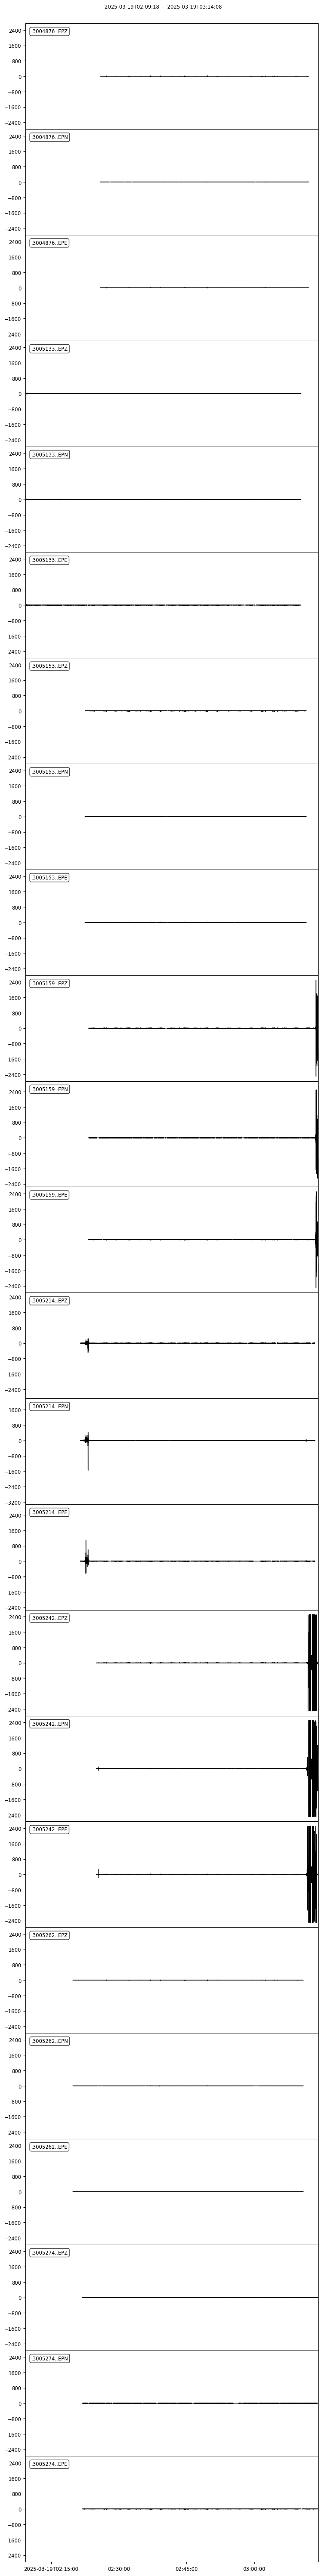

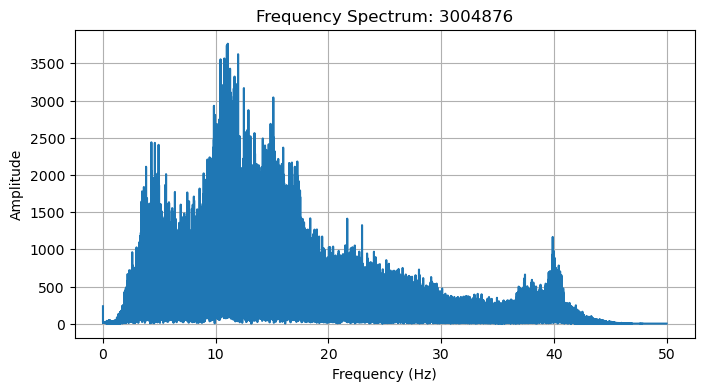

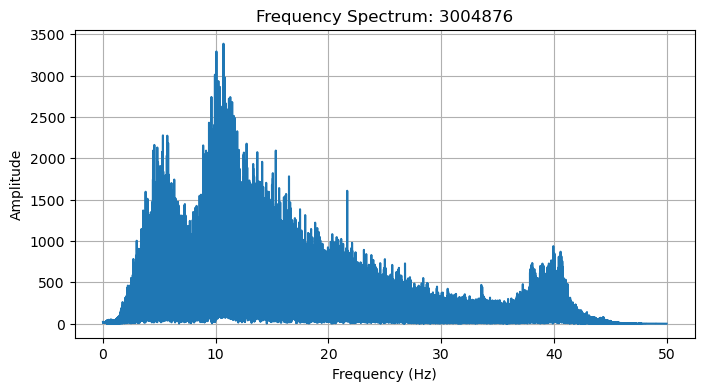

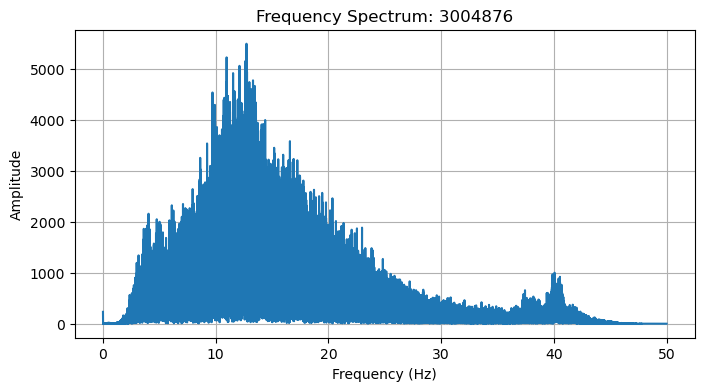

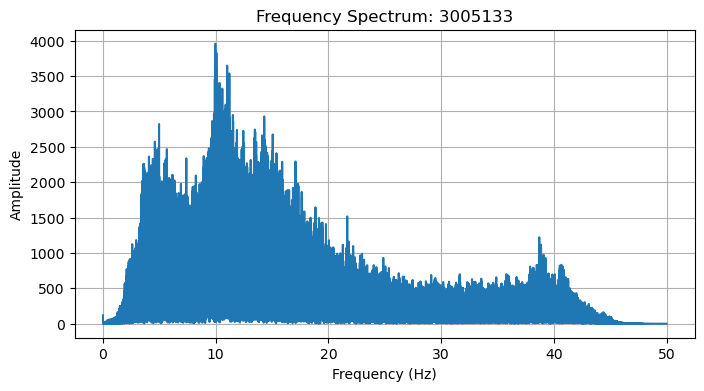

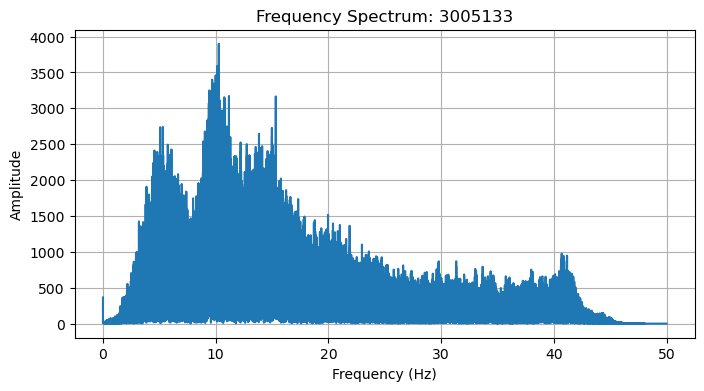

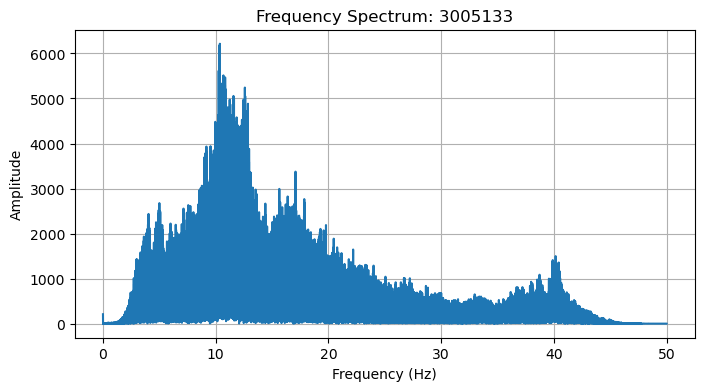

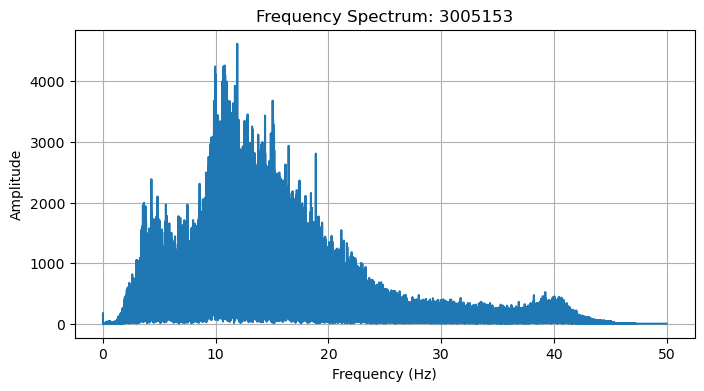

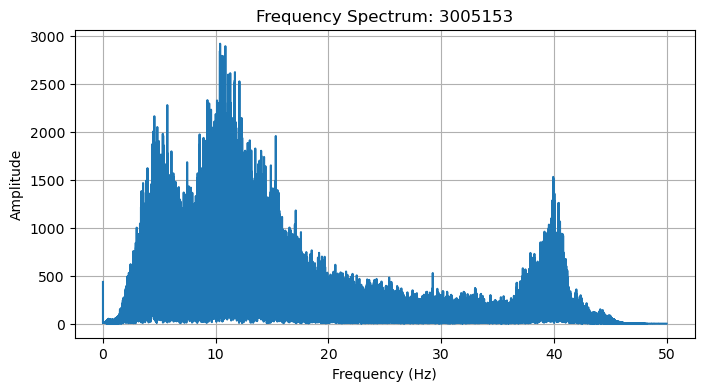

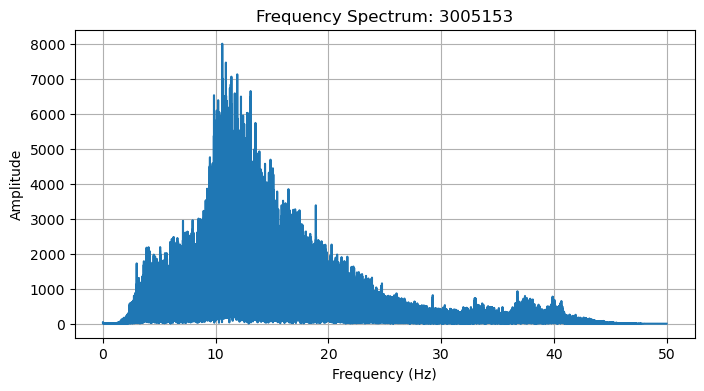

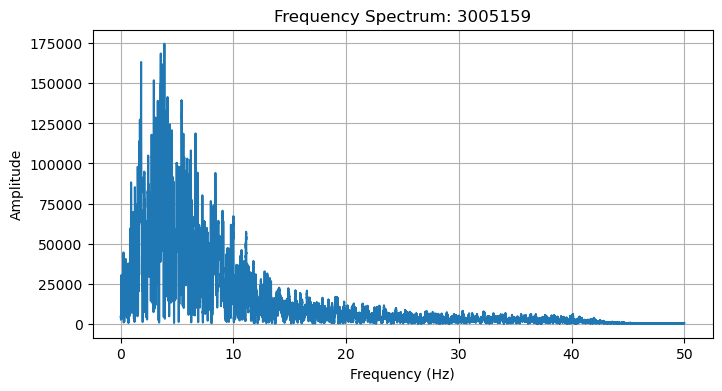

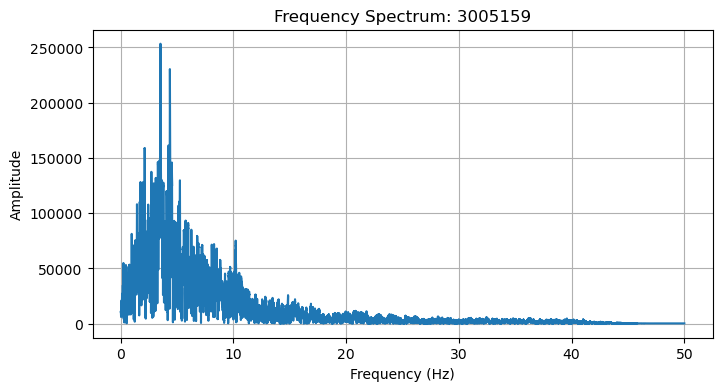

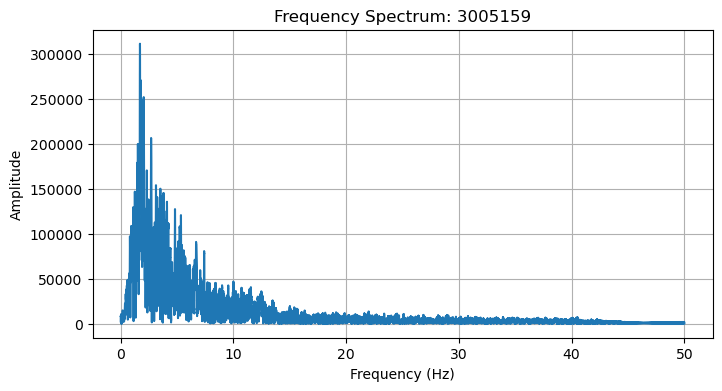

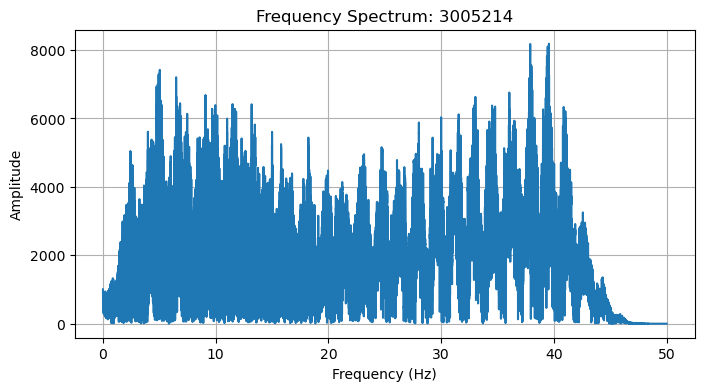

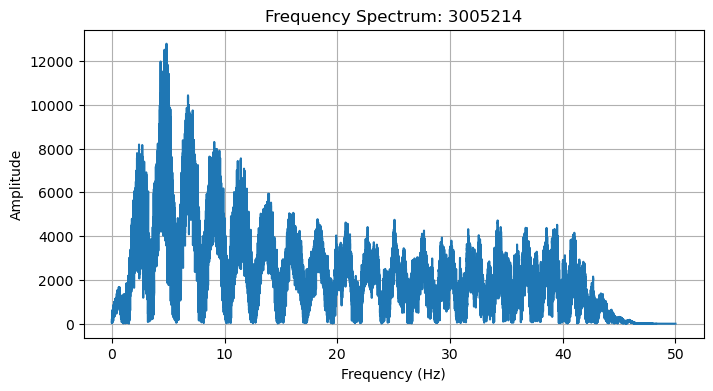

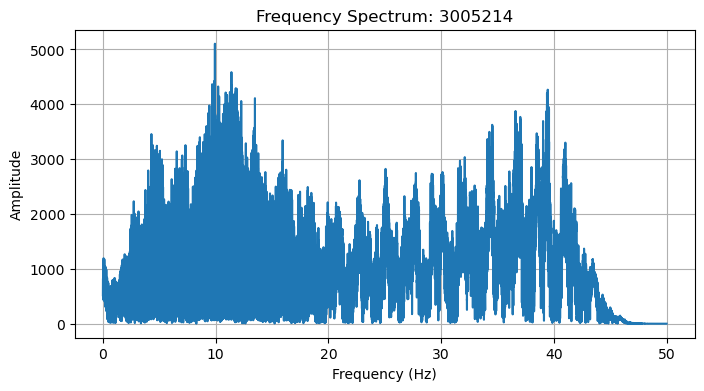

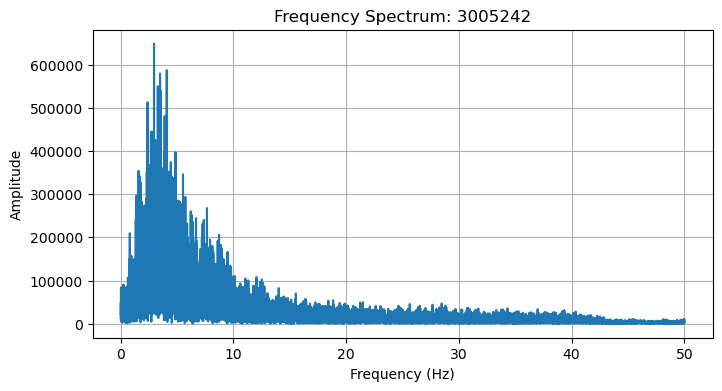

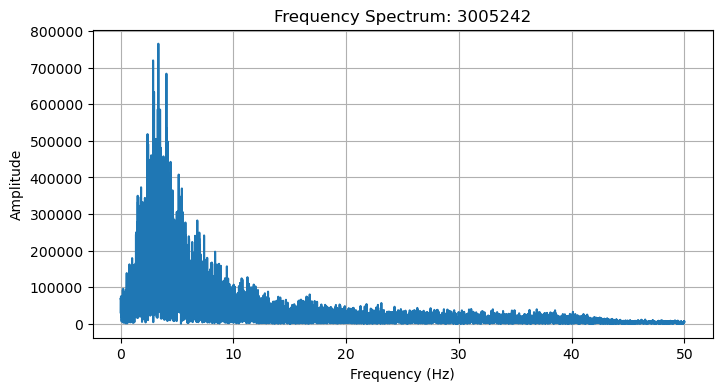

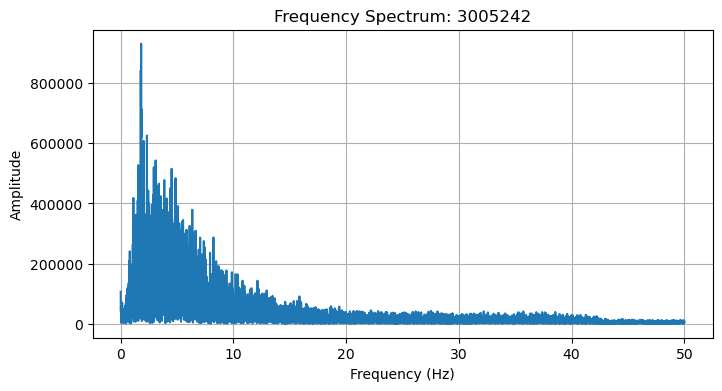

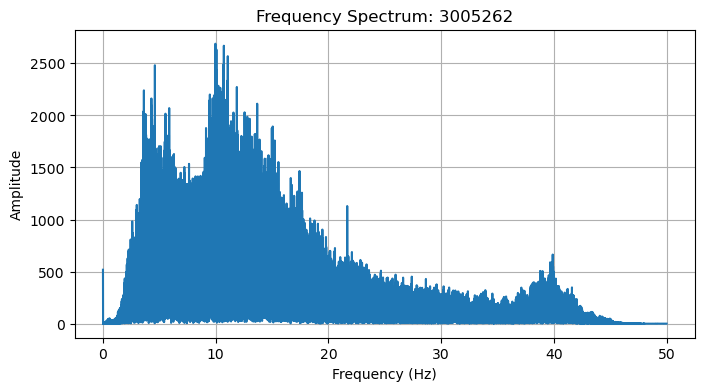

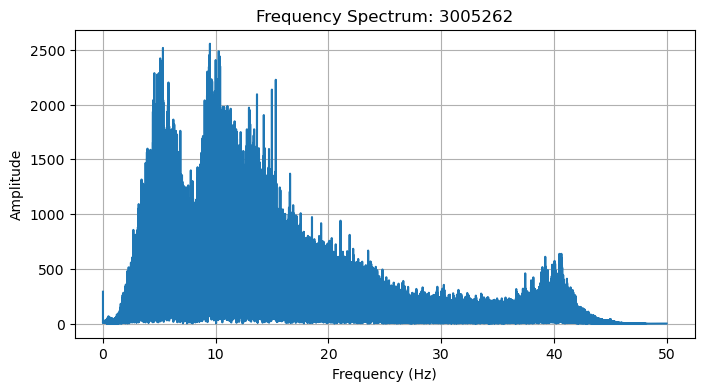

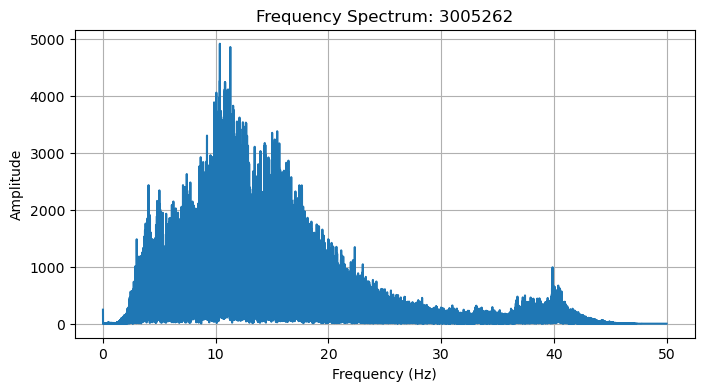

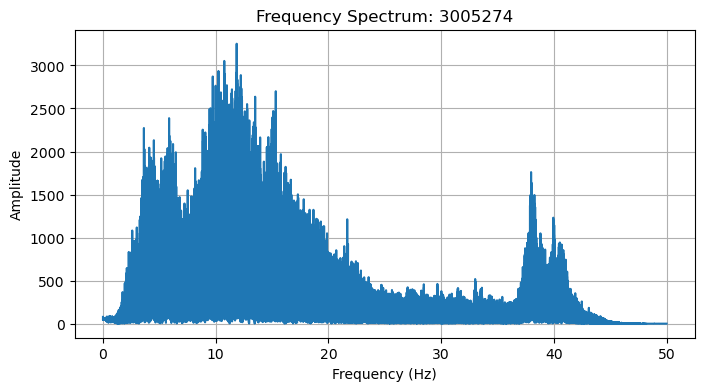

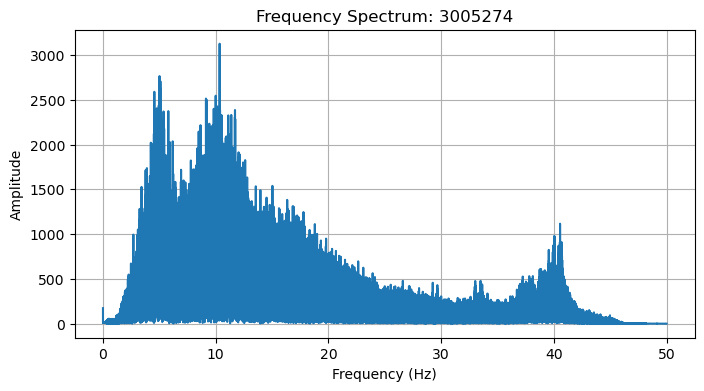

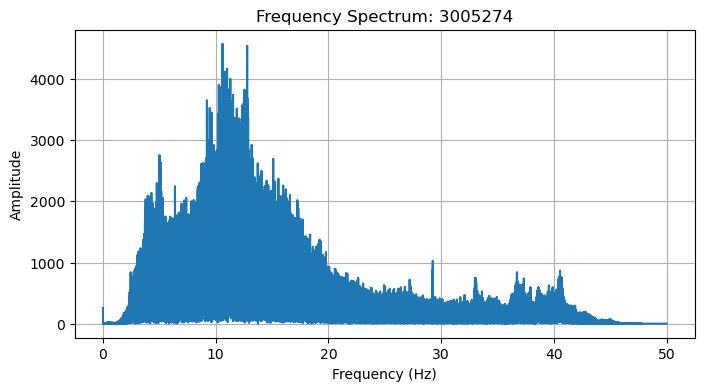

In [2]:
from obspy import read
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# 設定 SAC 資料夾的路徑
sac_folder = r"C:\Users\user\Downloads\sac"  # Windows 注意路徑前面加 r 避免轉義

# 找出所有 SAC 檔案
sac_files = glob.glob(os.path.join(sac_folder, "*.sac"))

# 確保資料夾內有檔案
if not sac_files:
    print("未找到 SAC 檔案，請檢查資料夾路徑！")
else:
    # 讀取所有 SAC 檔案
    st = read(sac_files[0])  # 先讀取第一個檔案初始化 Stream
    for sac_file in sac_files[1:]:  # 讀取剩下的檔案
        st += read(sac_file)
    
    # 合併重疊的波形（如果有）
    st.merge(method=1)
    
    # 顯示 SAC 檔案資訊
    print(st)
    
    # 繪製所有波形
    st.plot()
    
    # 頻譜分析
    for tr in st:
        npts = tr.stats.npts  # 資料點數
        delta = tr.stats.delta  # 取樣間隔（秒）
        data = tr.data  # 波形數據

        # 進行 FFT（快速傅立葉變換）
        freqs = fftfreq(npts, delta)  # 計算頻率軸
        fft_values = fft(data)  # 計算 FFT
        amplitude_spectrum = np.abs(fft_values)  # 計算振幅

        # 繪製頻譜圖
        plt.figure(figsize=(8, 4))
        plt.plot(freqs[:npts//2], amplitude_spectrum[:npts//2])  # 只顯示正頻率部分
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.title(f"Frequency Spectrum: {tr.stats.station}")
        plt.grid()
        plt.show()

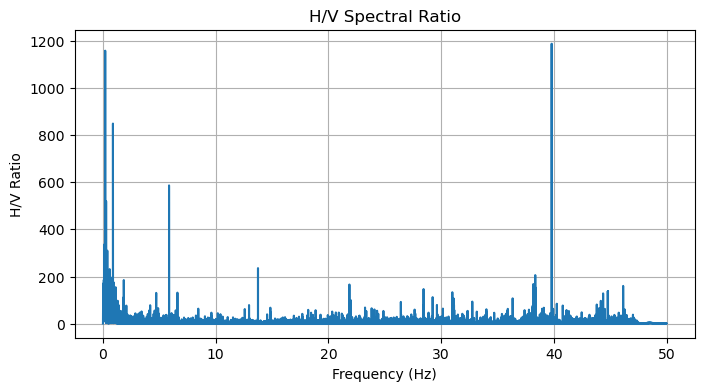

In [ ]:
from obspy import read
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# 設定 SAC 檔案的資料夾
sac_folder = r"C:\Users\user\Downloads\sac"

# 找出所有 SAC 檔案
sac_files = glob.glob(os.path.join(sac_folder, "*.sac"))

# 建立字典存放三分量數據
traces = {"E": None, "N": None, "Z": None}

# 讀取並分類 E, N, Z 分量
for sac_file in sac_files:
    if sac_file.endswith(".Z.sac"):
        traces["Z"] = read(sac_file)[0]
    elif sac_file.endswith(".E.sac"):
        traces["E"] = read(sac_file)[0]
    elif sac_file.endswith(".N.sac"):
        traces["N"] = read(sac_file)[0]

# 檢查是否有完整的三分量
if None in traces.values():
    print("❌ 缺少 E/N/Z 三分量，請確認檔案是否完整！")
else:
    # 取得基本資訊
    npts = traces["Z"].stats.npts  # 資料點數
    delta = traces["Z"].stats.delta  # 取樣間隔（秒）

    # 取得數據
    data_E = traces["E"].data
    data_N = traces["N"].data
    data_Z = traces["Z"].data

    # 計算 FFT
    freqs = fftfreq(npts, delta)  # 計算頻率軸
    fft_E = np.abs(fft(data_E))  # 計算東向 FFT 振幅
    fft_N = np.abs(fft(data_N))  # 計算北向 FFT 振幅
    fft_Z = np.abs(fft(data_Z))  # 計算垂直向 FFT 振幅

    # 計算水平振幅 H = sqrt(E^2 + N^2)
    fft_H = np.sqrt(fft_E**2 + fft_N**2)

    # 計算 H/V 比值
    hv_ratio = fft_H / fft_Z

    # 繪製 H/V 頻譜圖
    plt.figure(figsize=(8, 4))
    plt.plot(freqs[:npts//2], hv_ratio[:npts//2])  # 只顯示正頻率部分
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("H/V Ratio")
    plt.title("H/V Spectral Ratio")
    plt.grid()
    plt.show()


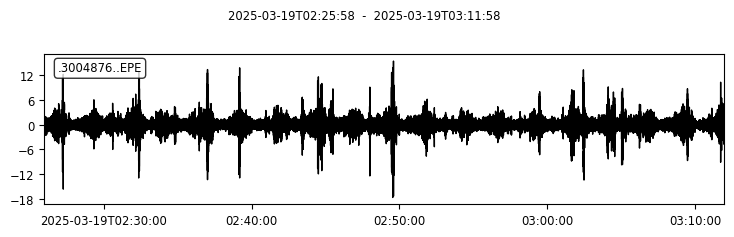

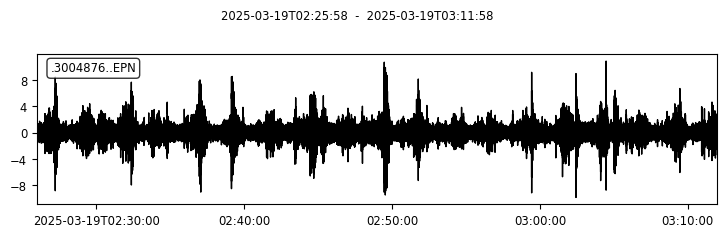

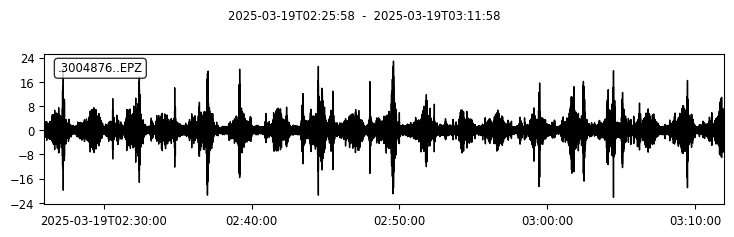

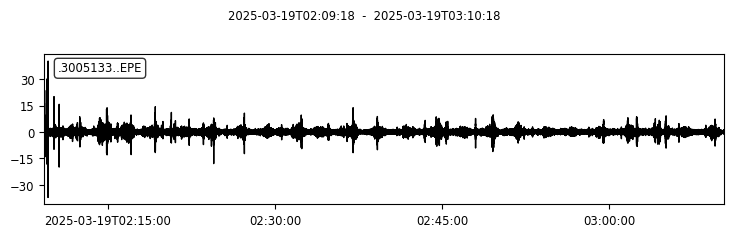

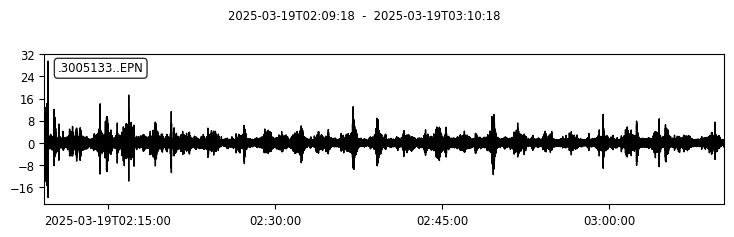

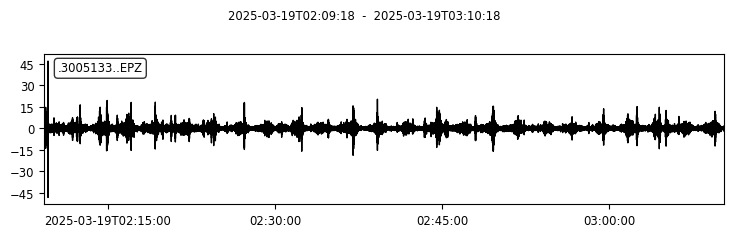

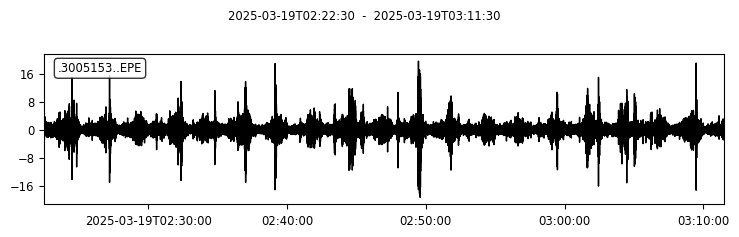

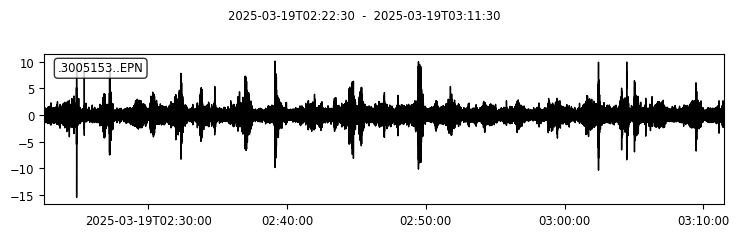

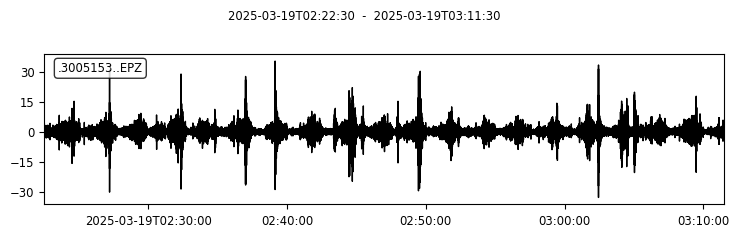

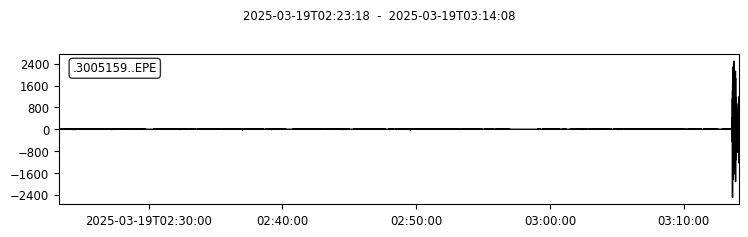

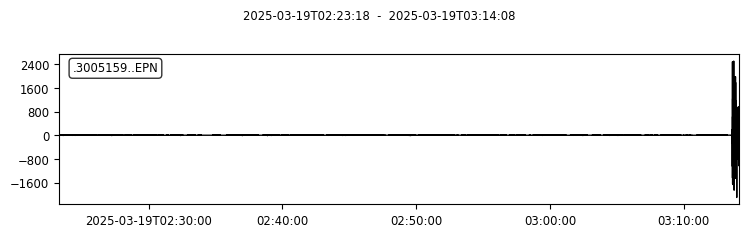

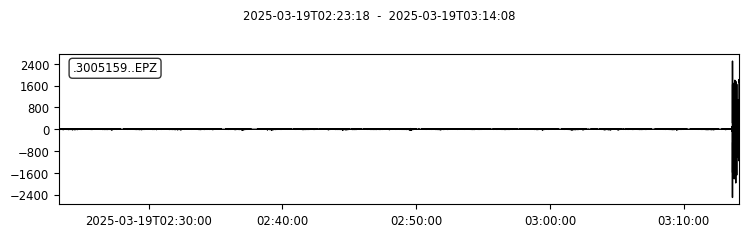

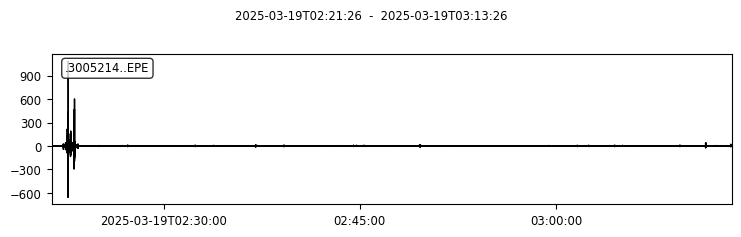

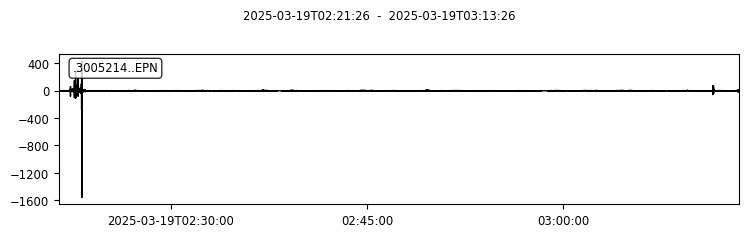

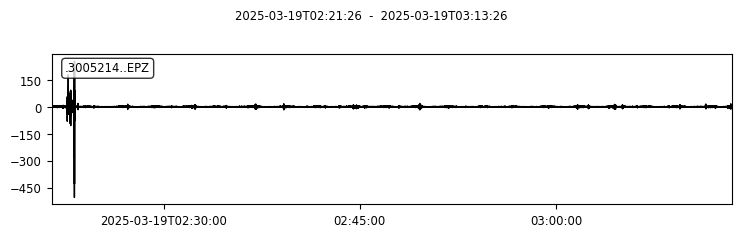

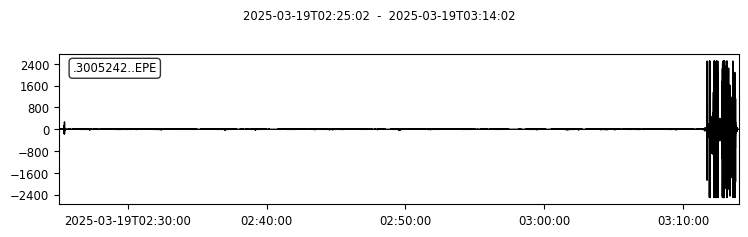

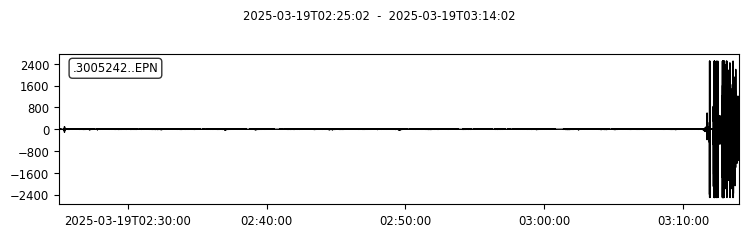

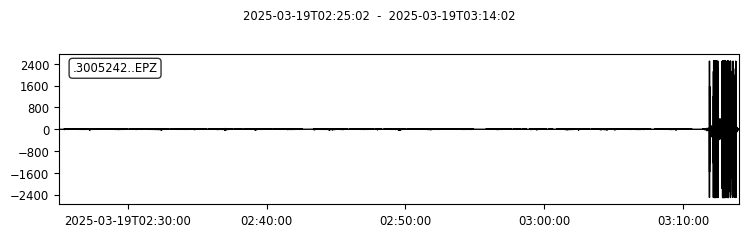

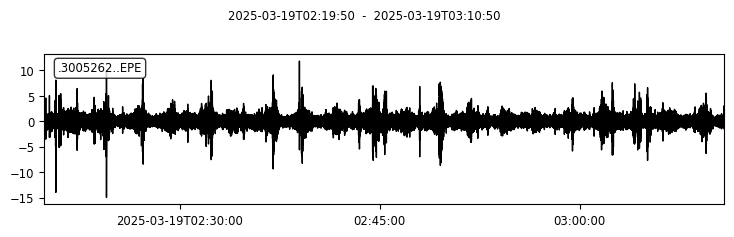

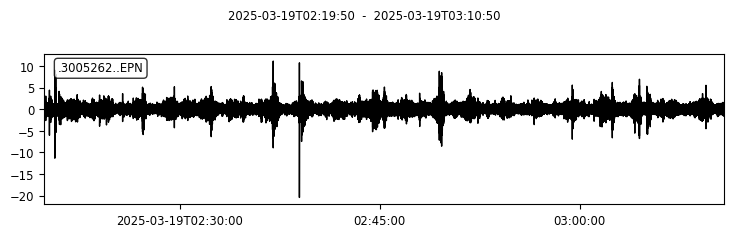

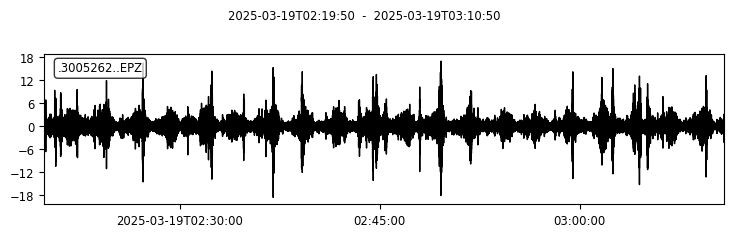

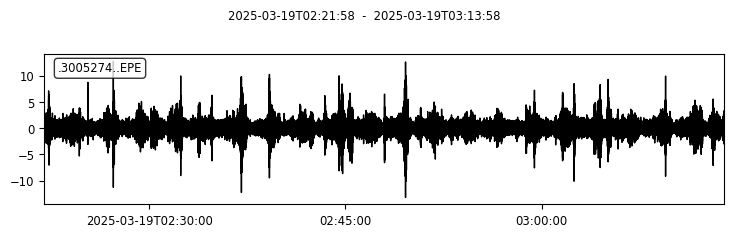

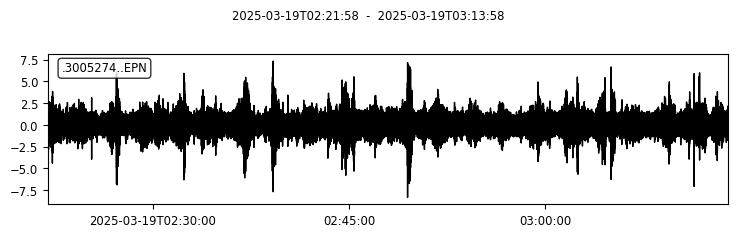

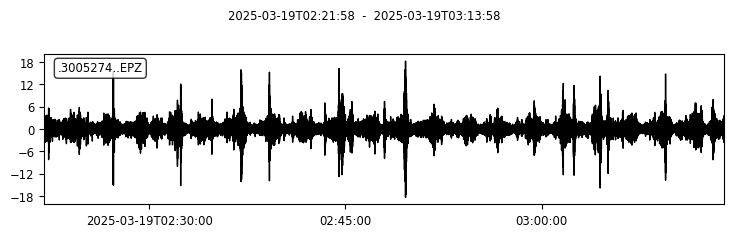

In [3]:
for i in st:
    i.plot();

In [4]:
for i in st:
    print(i)

.3004876..EPE | 2025-03-19T02:25:58.000000Z - 2025-03-19T03:11:58.000000Z | 100.0 Hz, 276001 samples
.3004876..EPN | 2025-03-19T02:25:58.000000Z - 2025-03-19T03:11:58.000000Z | 100.0 Hz, 276001 samples
.3004876..EPZ | 2025-03-19T02:25:58.000000Z - 2025-03-19T03:11:58.000000Z | 100.0 Hz, 276001 samples
.3005133..EPE | 2025-03-19T02:09:18.000000Z - 2025-03-19T03:10:18.000000Z | 100.0 Hz, 366001 samples
.3005133..EPN | 2025-03-19T02:09:18.000000Z - 2025-03-19T03:10:18.000000Z | 100.0 Hz, 366001 samples
.3005133..EPZ | 2025-03-19T02:09:18.000000Z - 2025-03-19T03:10:18.000000Z | 100.0 Hz, 366001 samples
.3005153..EPE | 2025-03-19T02:22:30.000000Z - 2025-03-19T03:11:30.000000Z | 100.0 Hz, 294001 samples
.3005153..EPN | 2025-03-19T02:22:30.000000Z - 2025-03-19T03:11:30.000000Z | 100.0 Hz, 294001 samples
.3005153..EPZ | 2025-03-19T02:22:30.000000Z - 2025-03-19T03:11:30.000000Z | 100.0 Hz, 294001 samples
.3005159..EPE | 2025-03-19T02:23:18.000000Z - 2025-03-19T03:14:08.000000Z | 100.0 Hz, 30500

c:\Users\user\.conda\envs\pygmt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\.conda\envs\pygmt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


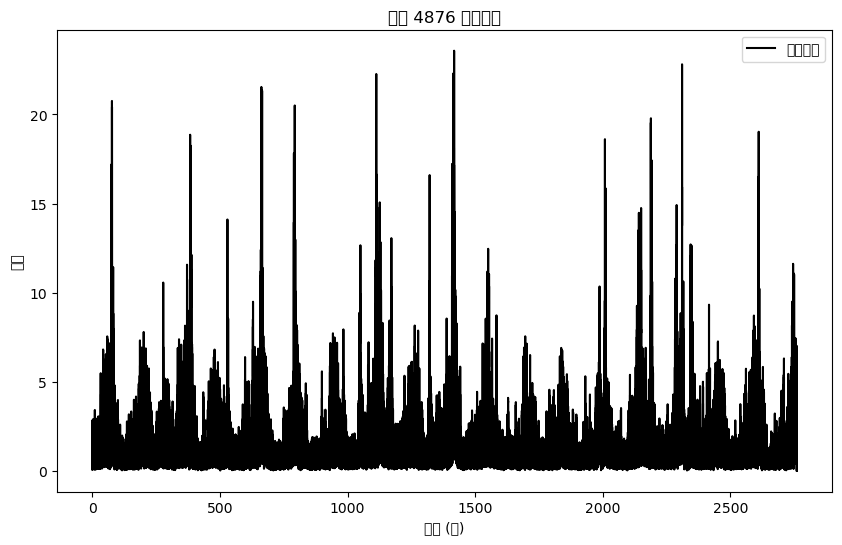

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read

# 讀取 SAC 檔案
sac_folder = r"C:\Users\user\Downloads\sac"
st = read(f"{sac_folder}\\*.sac")

# 篩選出 4876 站的 EPE、EPN、EPZ 分量
st_4876 = sorted([tr for tr in st if "4876" in tr.id], key=lambda x: x.id)

# 檢查是否有三個分量
if len(st_4876) != 3:
    print("無法找到完整的 EPE、EPN、EPZ 三個分量！")
else:
    # 取得三個分量的資料
    epe = st_4876[0].data
    epn = st_4876[1].data
    epz = st_4876[2].data

    # 計算合成波形
    composite_waveform = np.sqrt(epe**2 + epn**2 + epz**2)

    # 時間軸（假設三個分量的時間相同）
    time = st_4876[0].times()

    # 繪圖
    plt.figure(figsize=(10, 6))
    plt.plot(time, composite_waveform, color="k", label="合成波形")
    plt.xlabel("時間 (秒)")
    plt.ylabel("振幅")
    plt.title("站點 4876 合成波形")
    plt.legend()
    plt.show()


c:\Users\user\.conda\envs\pygmt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21151 (\N{CJK UNIFIED IDEOGRAPH-529F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\.conda\envs\pygmt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\.conda\envs\pygmt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35676 (\N{CJK UNIFIED IDEOGRAPH-8B5C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\.conda\envs\pygmt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\.conda\envs\pygmt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current fon

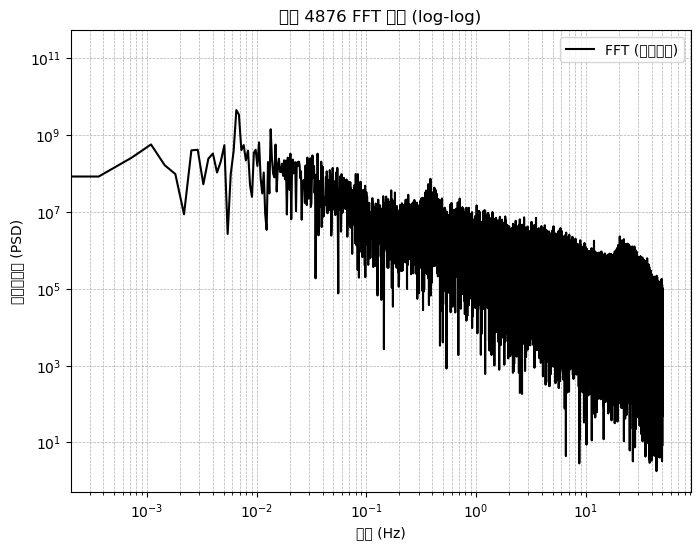

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read

# 讀取 SAC 檔案
sac_folder = r"C:\Users\user\Downloads\sac"
st = read(f"{sac_folder}\\*.sac")

# 篩選出 4876 站的 EPE、EPN、EPZ 分量
st_4876 = sorted([tr for tr in st if "4876" in tr.id], key=lambda x: x.id)

# 檢查是否有三個分量
if len(st_4876) != 3:
    print("無法找到完整的 EPE、EPN、EPZ 三個分量！")
else:
    # 取得三個分量的資料
    epe = st_4876[0].data
    epn = st_4876[1].data
    epz = st_4876[2].data

    # 計算合成波形
    composite_waveform = np.sqrt(epe**2 + epn**2 + epz**2)

    # 取得取樣頻率
    sampling_rate = st_4876[0].stats.sampling_rate
    n = len(composite_waveform)

    # 計算 FFT
    fft_values = np.fft.rfft(composite_waveform)
    freq = np.fft.rfftfreq(n, d=1.0/sampling_rate)

    # 計算功率譜密度 (Power Spectral Density, PSD)
    power_spectrum = np.abs(fft_values) ** 2

    # 繪製 log-log 頻譜圖
    plt.figure(figsize=(8, 6))
    plt.loglog(freq, power_spectrum, color="k", label="FFT (合成波形)")
    plt.xlabel("頻率 (Hz)")
    plt.ylabel("功率譜密度 (PSD)")
    plt.title("站點 4876 FFT 頻譜 (log-log)")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()


c:\Users\user\.conda\envs\pygmt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


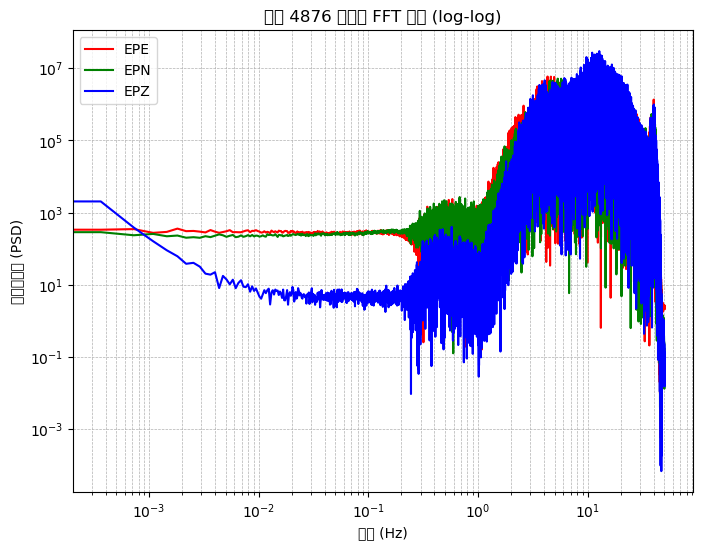

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read

# 讀取 SAC 檔案
sac_folder = r"C:\Users\user\Downloads\sac"
st = read(f"{sac_folder}\\*.sac")

# 篩選出 4876 站的 EPE、EPN、EPZ 分量
st_4876 = sorted([tr for tr in st if "4876" in tr.id], key=lambda x: x.id)

# 檢查是否有三個分量
if len(st_4876) != 3:
    print("無法找到完整的 EPE、EPN、EPZ 三個分量！")
else:
    # 取得三個分量的資料
    epe = st_4876[0].data
    epn = st_4876[1].data
    epz = st_4876[2].data

    # 取得取樣頻率
    sampling_rate = st_4876[0].stats.sampling_rate
    n = len(epe)

    # 計算 FFT
    freq = np.fft.rfftfreq(n, d=1.0/sampling_rate)
    fft_epe = np.abs(np.fft.rfft(epe)) ** 2  # EPE 的功率譜
    fft_epn = np.abs(np.fft.rfft(epn)) ** 2  # EPN 的功率譜
    fft_epz = np.abs(np.fft.rfft(epz)) ** 2  # EPZ 的功率譜

    # 繪製 log-log 頻譜圖
    plt.figure(figsize=(8, 6))
    plt.loglog(freq, fft_epe, label="EPE", color="r")
    plt.loglog(freq, fft_epn, label="EPN", color="g")
    plt.loglog(freq, fft_epz, label="EPZ", color="b")
    
    plt.xlabel("頻率 (Hz)")
    plt.ylabel("功率譜密度 (PSD)")
    plt.title("站點 4876 各分量 FFT 頻譜 (log-log)")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()


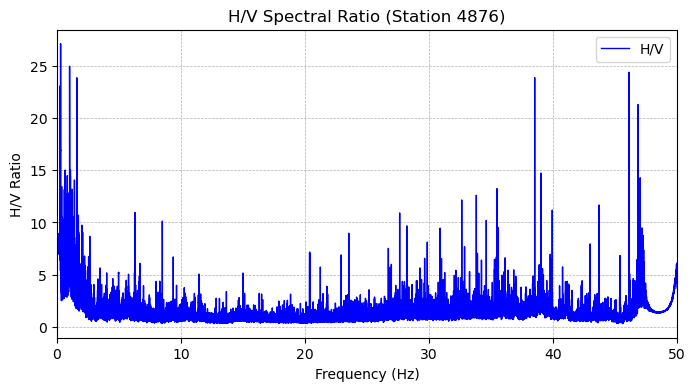

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read

# 讀取 SAC 檔案
sac_folder = r"C:\Users\user\Downloads\sac"
st = read(f"{sac_folder}\\*.sac")

# 篩選 4876 站的 EPE、EPN、EPZ
st_4876 = sorted([tr for tr in st if "4876" in tr.id], key=lambda x: x.id)

# 確保有完整三個分量
if len(st_4876) != 3:
    print("錯誤: 找不到完整的 EPE、EPN、EPZ 三個分量！")
else:
    # 讀取波形資料
    epe = st_4876[0].data
    epn = st_4876[1].data
    epz = st_4876[2].data

    # 取樣頻率
    sampling_rate = st_4876[0].stats.sampling_rate
    n = len(epe)

    # 計算 FFT
    freq = np.fft.rfftfreq(n, d=1.0/sampling_rate)
    fft_epe = np.abs(np.fft.rfft(epe))
    fft_epn = np.abs(np.fft.rfft(epn))
    fft_epz = np.abs(np.fft.rfft(epz))

    # 計算 H/V 頻譜比
    H_rms = np.sqrt((fft_epe**2 + fft_epn**2) / 2)  # 水平分量 RMS
    HV_ratio = H_rms / (fft_epz + 1e-10)  # 避免除以 0

    # 平滑處理 (移動平均)
    def moving_average(data, window_size=5):
        return np.convolve(data, np.ones(window_size)/window_size, mode='same')

    HV_ratio_smooth = moving_average(HV_ratio, window_size=10)

    # 繪製 H/V Spectral Ratio（線性尺度）
    plt.figure(figsize=(8, 4))
    plt.plot(freq, HV_ratio_smooth, label="H/V", color="blue", linewidth=1)

    plt.xlabel("Frequency (Hz)")
    plt.ylabel("H/V Ratio")
    plt.title("H/V Spectral Ratio (Station 4876)")
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.xlim(0, 50)  # 限制頻率範圍到 50Hz
    plt.show()
